In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Alcantarilla

In [2]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,265.0,39.0,12,2.582276e-02,4.0,10.0,15.0,71.0,5.0,350.0,...,5.0,11.0,18.0,7.0,69.0,5.0,20.0,27.0,11.0,46.0
1,248.0,36.8,13,2.797466e-02,3.0,10.0,14.0,77.0,7.0,474.0,...,4.0,10.0,15.0,5.0,71.0,5.0,11.0,18.0,7.0,69.0
2,128.0,39.4,14,3.012655e-02,4.0,11.0,17.0,77.0,8.0,482.0,...,3.0,10.0,14.0,7.0,77.0,4.0,10.0,15.0,5.0,71.0
3,185.0,33.6,15,3.227844e-02,4.0,8.0,14.0,82.0,4.0,455.0,...,4.0,11.0,17.0,8.0,77.0,3.0,10.0,14.0,7.0,77.0
4,232.0,33.6,16,3.443033e-02,2.0,9.0,12.0,87.0,9.0,368.0,...,4.0,8.0,14.0,4.0,82.0,4.0,11.0,17.0,8.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17503,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,3.0,31.0,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0
17504,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,15.0,49.0,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0
17505,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,39.0,56.0,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0
17506,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,84.0,63.0,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0


In [3]:
x = alc[['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour']]
y = alc[['NO (µg/m³N)']]

In [4]:
x_train = x[5000:]
y_train = y[5000:]
x_test = x[:5000]
y_test = y[:5000]

In [5]:
rf = RandomForestRegressor()

In [6]:
rf.fit(x_train,y_train)

<ipython-input-6-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [7]:
y_pred = rf.predict(x_test)
y_pred

array([2.92, 2.66, 3.38, ..., 1.16, 1.01, 1.16])

In [8]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = rf.score(x,y)
acc = rf.score(x_test,y_test)
print('R-squared:',score,'\n','RMSE: ',rmse,'\n','Accuracy: ',acc)

R-squared: 0.9991203296314786 
 RMSE:  0.9107051369131504 
 Accuracy:  0.9965970918984149


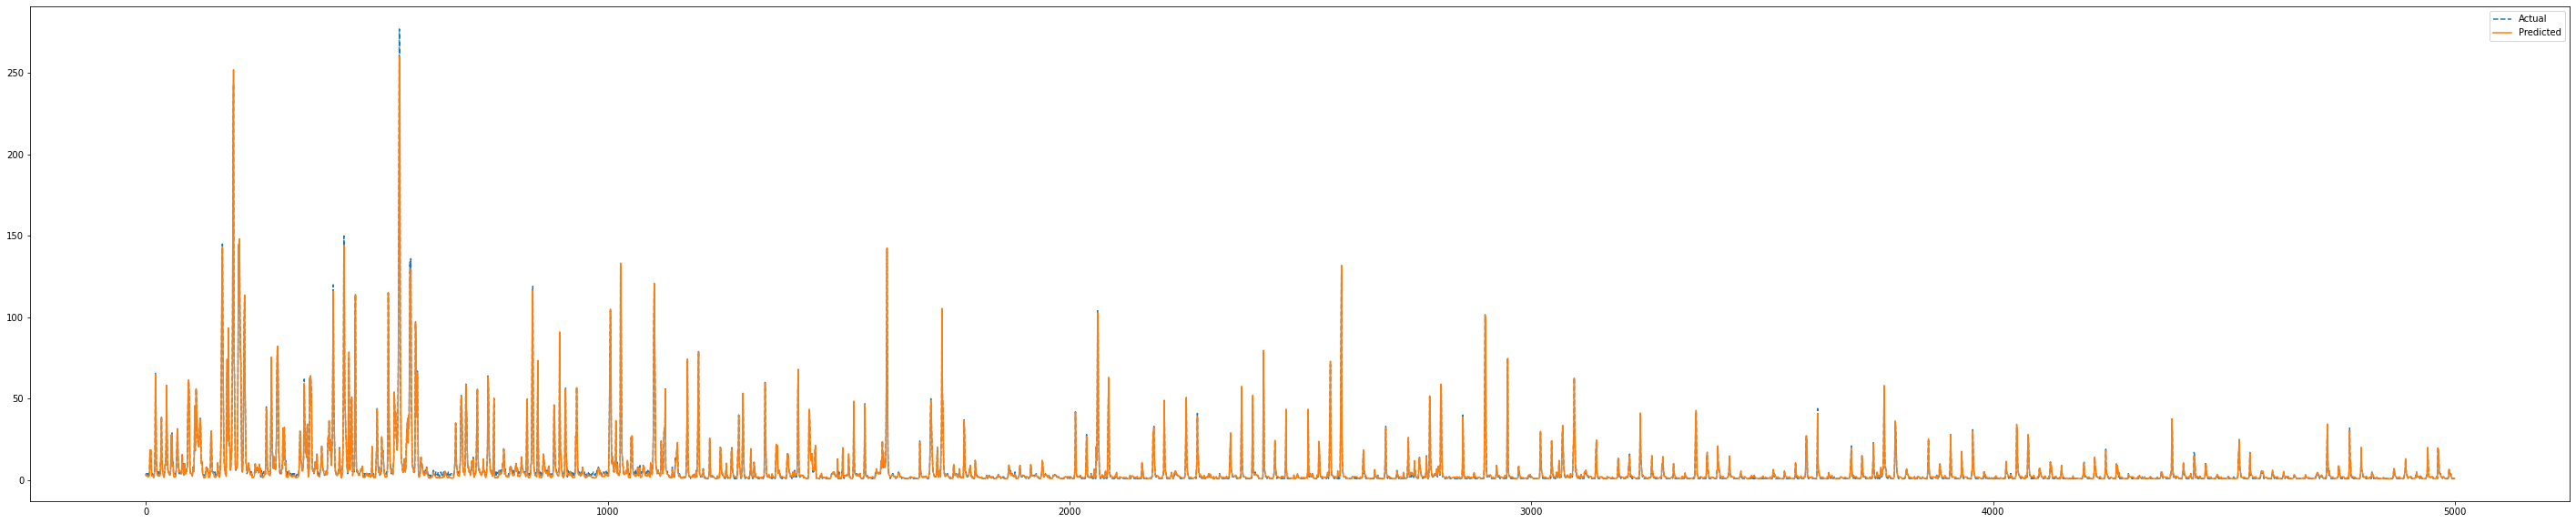

In [9]:
plt.figure(figsize=(50,10))
plt.plot(np.array(y_test),'--')
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])

In [20]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    rf.fit(x_train,y_train)  
    y_pred = rf.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = rf.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

<ipython-input-20-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NOX (µg/m³N) 
 R-squared: 0.9984156880563102 
 RMSE:  0.9000359948357622


<ipython-input-20-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO (µg/m³N) 
 R-squared: 0.9869215397605204 
 RMSE:  0.87805666058632


<ipython-input-20-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO2 (µg/m³N) 
 R-squared: 0.9948483981996238 
 RMSE:  1.1755020513806005


<ipython-input-20-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


SO2 (µg/m³N) 
 R-squared: 0.7687822002815905 
 RMSE:  3.1972718539404807


<ipython-input-20-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


O3 (µg/m³N) 
 R-squared: 0.8788753919335008 
 RMSE:  14.181458505725


<ipython-input-20-d71bdd236a3d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


PM10 (µg/m³N) 
 R-squared: 0.7729977478488839 
 RMSE:  14.374443983292014


# Aljorra

In [11]:
alc = pd.read_csv('al.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,306.0,35.0,12,2.582276e-02,4.0,10.0,16.0,74.0,4.0,253.0,...,4.0,8.0,13.0,10.0,70.0,3.0,8.0,13.0,8.0,73.0
1,262.0,24.0,13,2.797466e-02,4.0,11.0,17.0,86.0,17.0,510.0,...,4.0,10.0,16.0,4.0,74.0,4.0,8.0,13.0,10.0,70.0
2,217.0,34.0,14,3.012655e-02,4.0,11.0,17.0,81.0,20.0,501.0,...,4.0,11.0,17.0,17.0,86.0,4.0,10.0,16.0,4.0,74.0
3,205.0,45.0,15,3.227844e-02,5.0,9.0,16.0,79.0,31.0,469.0,...,4.0,11.0,17.0,20.0,81.0,4.0,11.0,17.0,17.0,86.0
4,214.0,42.0,16,3.443033e-02,3.0,7.0,11.0,87.0,63.0,370.0,...,5.0,9.0,16.0,31.0,79.0,4.0,11.0,17.0,20.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17503,158.0,87.0,19,8.607594e-03,3.0,18.0,22.0,43.0,39.0,2.0,...,2.0,11.0,14.0,21.0,62.0,2.0,12.0,15.0,24.0,56.0
17504,245.0,94.0,20,6.455696e-03,6.0,29.0,38.0,19.0,36.0,2.0,...,3.0,18.0,22.0,39.0,43.0,2.0,11.0,14.0,21.0,62.0
17505,317.0,98.0,21,4.303797e-03,15.0,31.0,54.0,5.0,53.0,2.0,...,6.0,29.0,38.0,36.0,19.0,3.0,18.0,22.0,39.0,43.0
17506,306.0,100.0,22,2.151899e-03,3.0,23.0,28.0,9.0,26.0,3.0,...,15.0,31.0,54.0,53.0,5.0,6.0,29.0,38.0,36.0,19.0


In [19]:
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    rf.fit(x_train,y_train)  
    y_pred = rf.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = rf.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

<ipython-input-19-c5ab491418d7>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NOX (µg/m³N) 
 R-squared: 0.9983738766916549 
 RMSE:  0.9189143938365532


<ipython-input-19-c5ab491418d7>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO (µg/m³N) 
 R-squared: 0.9706104751735719 
 RMSE:  1.3699517740416998


<ipython-input-19-c5ab491418d7>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO2 (µg/m³N) 
 R-squared: 0.9947965038672814 
 RMSE:  1.167540435274085


<ipython-input-19-c5ab491418d7>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


SO2 (µg/m³N) 
 R-squared: 0.5906129233323761 
 RMSE:  5.0596061721047025


<ipython-input-19-c5ab491418d7>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


O3 (µg/m³N) 
 R-squared: 0.9249468156929131 
 RMSE:  11.181978905971876


<ipython-input-19-c5ab491418d7>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


PM10 (µg/m³N) 
 R-squared: 0.7890469941908972 
 RMSE:  14.04454461558651


# Time Series

# alcantarilla

In [13]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,265.0,39.0,12,2.582276e-02,4.0,10.0,15.0,71.0,5.0,350.0,...,5.0,11.0,18.0,7.0,69.0,5.0,20.0,27.0,11.0,46.0
1,248.0,36.8,13,2.797466e-02,3.0,10.0,14.0,77.0,7.0,474.0,...,4.0,10.0,15.0,5.0,71.0,5.0,11.0,18.0,7.0,69.0
2,128.0,39.4,14,3.012655e-02,4.0,11.0,17.0,77.0,8.0,482.0,...,3.0,10.0,14.0,7.0,77.0,4.0,10.0,15.0,5.0,71.0
3,185.0,33.6,15,3.227844e-02,4.0,8.0,14.0,82.0,4.0,455.0,...,4.0,11.0,17.0,8.0,77.0,3.0,10.0,14.0,7.0,77.0
4,232.0,33.6,16,3.443033e-02,2.0,9.0,12.0,87.0,9.0,368.0,...,4.0,8.0,14.0,4.0,82.0,4.0,11.0,17.0,8.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17503,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,3.0,31.0,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0
17504,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,15.0,49.0,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0
17505,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,39.0,56.0,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0
17506,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,84.0,63.0,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0


In [18]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    rf.fit(x_train,y_train)  
    y_pred = rf.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = rf.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

<ipython-input-18-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NOX (µg/m³N) 
 R-squared: 0.8970617979689643 
 RMSE:  7.220422177130643


<ipython-input-18-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO (µg/m³N) 
 R-squared: 0.7913338939147906 
 RMSE:  3.2696956606999374


<ipython-input-18-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO2 (µg/m³N) 
 R-squared: 0.9326443528433942 
 RMSE:  3.7217599729160398


<ipython-input-18-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


SO2 (µg/m³N) 
 R-squared: 0.6129569287046486 
 RMSE:  4.939527005857949


<ipython-input-18-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


O3 (µg/m³N) 
 R-squared: 0.9660685181291357 
 RMSE:  6.747803247931879


<ipython-input-18-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


PM10 (µg/m³N) 
 R-squared: 0.833776195013006 
 RMSE:  11.892035499711561


# aljorra

In [15]:
alc = pd.read_csv('al.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,306.0,35.0,12,2.582276e-02,4.0,10.0,16.0,74.0,4.0,253.0,...,4.0,8.0,13.0,10.0,70.0,3.0,8.0,13.0,8.0,73.0
1,262.0,24.0,13,2.797466e-02,4.0,11.0,17.0,86.0,17.0,510.0,...,4.0,10.0,16.0,4.0,74.0,4.0,8.0,13.0,10.0,70.0
2,217.0,34.0,14,3.012655e-02,4.0,11.0,17.0,81.0,20.0,501.0,...,4.0,11.0,17.0,17.0,86.0,4.0,10.0,16.0,4.0,74.0
3,205.0,45.0,15,3.227844e-02,5.0,9.0,16.0,79.0,31.0,469.0,...,4.0,11.0,17.0,20.0,81.0,4.0,11.0,17.0,17.0,86.0
4,214.0,42.0,16,3.443033e-02,3.0,7.0,11.0,87.0,63.0,370.0,...,5.0,9.0,16.0,31.0,79.0,4.0,11.0,17.0,20.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17503,158.0,87.0,19,8.607594e-03,3.0,18.0,22.0,43.0,39.0,2.0,...,2.0,11.0,14.0,21.0,62.0,2.0,12.0,15.0,24.0,56.0
17504,245.0,94.0,20,6.455696e-03,6.0,29.0,38.0,19.0,36.0,2.0,...,3.0,18.0,22.0,39.0,43.0,2.0,11.0,14.0,21.0,62.0
17505,317.0,98.0,21,4.303797e-03,15.0,31.0,54.0,5.0,53.0,2.0,...,6.0,29.0,38.0,36.0,19.0,3.0,18.0,22.0,39.0,43.0
17506,306.0,100.0,22,2.151899e-03,3.0,23.0,28.0,9.0,26.0,3.0,...,15.0,31.0,54.0,53.0,5.0,6.0,29.0,38.0,36.0,19.0


In [17]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    rf.fit(x_train,y_train)  
    y_pred = rf.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = rf.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

<ipython-input-17-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NOX (µg/m³N) 
 R-squared: 0.8959771876231147 
 RMSE:  7.268076377089058


<ipython-input-17-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO (µg/m³N) 
 R-squared: 0.7925459461620732 
 RMSE:  3.282052335231722


<ipython-input-17-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


NO2 (µg/m³N) 
 R-squared: 0.9325185503541237 
 RMSE:  3.730985271908749


<ipython-input-17-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


SO2 (µg/m³N) 
 R-squared: 0.6165808482787976 
 RMSE:  4.915693192948478


<ipython-input-17-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


O3 (µg/m³N) 
 R-squared: 0.9663923297541498 
 RMSE:  6.685617050773997


<ipython-input-17-2bb5878ccd8c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


PM10 (µg/m³N) 
 R-squared: 0.8350264319758394 
 RMSE:  11.921460238678819
